Water is the ultimate gift of nature to humanity and every living organism. Most of us have the luxury to lead our daily lives without feeling blunt of water scarcity but there are people in some parts of the world where they would have to walk several miles to have access to water. The situation worsens for them if this access, such as pumps, wells, or other water-points, also shuts down unexpectedly.

If a Machine Learning algorithm can predict which water point may fail in the immediate future, they can divert the maintenance resource towards that point with reasonable advance notice.

ProblemStatement: Your goal is to build an Decision Tree classification model(s) which trains on the given data, is appropriately validated, and finally predicts on the test data provided to you.

● Id - row id

● Amount_of _water - Amount of water available in the waterpump

● Gps_height - Altitude of the well

● Waterpoint_type - The kind of waterpoint

● Basin_name - Geographic water basin

● Village - Geographic location

● Regionname - Geographic location

● Region_code- Geographic location (coded)

● Wardname- Geographic location(renamed the original location)

● District_code - Geographic location (coded)

● Population – No of people around the well

● Public_meeting – Is there any public meetings were conducted. (If Yes TRUE otherwise False)

● Organization_funding - organization that provides money for that well construction

● Organization_surveyed– organization which has done survey to collect the data

● Scheme_management - Organization operating the water point

● Schemename – scheme name under which water point sanctioned

● Permit - Is the waterpoint has the permission to use

● Company_installed - Organization that installed the pump

● Management - How the waterpoint is managed

● Management_group – Group which manages the water point.

● Extraction_type – Way of extracting the water

● Extraction_type_group - Way of extracting the water

● Extraction_type_class – class of equipment used to extract the water

● Payment - What the water costs type of payment

● Payment_type - What the water costs type of payment

● Water_quality - The quality of the water

● Quality_group - The quality of the water

● Quantity - The quantity of water

● Quantity_group - The quantity of water

● Source - The source of the water

● Source_type - The source of the water

● Source_class - The source of the water

● Waterpoint_type_group - The kind of waterpoint.

● Status- Target variable (1/0 - functional/non-functional)

In [2]:
import numpy as np

import pandas as pd

#import the data

In [3]:
train1=pd.read_csv('/content/traindata.csv')
test1=pd.read_csv('/content/testdata.csv')

In [4]:
train1.head()

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
0,56421,0.0,1555,hand pump,basin3,village8556,region4,15,ward500,3,...,never pay,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,0
1,21324,500.0,857,communal standpipe multiple,basin7,village7372,region5,10,ward1800,5,...,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,0
2,74,0.0,0,communal standpipe,basin1,village9460,region6,17,ward883,3,...,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,0
3,74038,0.0,0,other,basin5,village13878,region13,18,ward1505,7,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,0
4,29929,0.0,0,hand pump,basin4,village5192,region6,14,ward942,4,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,1


In [5]:
train1.tail()

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
44063,33555,0.0,0,improved spring,basin5,village16282,region13,18,ward1422,2,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,improved spring,1
44064,17775,0.0,618,hand pump,basin8,village10061,region5,10,ward2060,1,...,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,0
44065,34200,0.0,1582,communal standpipe,basin7,village9791,region12,11,ward1897,4,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,0
44066,17012,200.0,629,communal standpipe,basin6,village12243,region15,3,ward1248,3,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,1
44067,28533,0.0,1512,hand pump,basin1,village2454,region7,13,ward1948,4,...,never pay,soft,good,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,0


In [6]:
train1["Scheme_management"]

0                    VWC
1                    VWC
2                    VWC
3                    VWC
4                    VWC
              ...       
44063                VWC
44064                VWC
44065                VWC
44066    Water authority
44067                WUG
Name: Scheme_management, Length: 44068, dtype: object

In [7]:
train1['Organization_funding']

0         Org_543
1        Org_1233
2        Org_1409
3        Org_1460
4         Iorg788
           ...   
44063    Iorg1388
44064     Org_761
44065    Org_1409
44066    Org_1656
44067     Org_660
Name: Organization_funding, Length: 44068, dtype: object

In [8]:
train1["SchemeName"]  

0            NaN
1        SCM1950
2            NaN
3            NaN
4            NaN
          ...   
44063        NaN
44064        NaN
44065     SCM171
44066     SCM136
44067        NaN
Name: SchemeName, Length: 44068, dtype: object

In [9]:
train1['Permit']

0        False
1         True
2         True
3         True
4         True
         ...  
44063     True
44064    False
44065    False
44066     True
44067     True
Name: Permit, Length: 44068, dtype: object

In [10]:
train1['Company_installed']

0        Iorg1388
1        Iorg1310
2        Iorg1510
3        Iorg1388
4         Iorg788
           ...   
44063    Iorg1388
44064     Iorg694
44065    Iorg1388
44066    Iorg1797
44067     Iorg610
Name: Company_installed, Length: 44068, dtype: object

In [11]:
train1.shape

(44068, 34)

In [12]:
test1.shape

(11015, 33)

In [13]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44068 entries, 0 to 44067
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     44068 non-null  int64  
 1   Amount_of_water        44068 non-null  float64
 2   Gps_height             44068 non-null  int64  
 3   Waterpoint_type        44068 non-null  object 
 4   Basin_name             44068 non-null  object 
 5   Village                44068 non-null  object 
 6   Regionname             44068 non-null  object 
 7   Region_code            44068 non-null  int64  
 8   Wardname               44068 non-null  object 
 9   District_code          44068 non-null  int64  
 10  Population             44068 non-null  int64  
 11  Public_meeting         41543 non-null  object 
 12  Organization_funding   41468 non-null  object 
 13  Organization_surveyed  44068 non-null  object 
 14  Scheme_management      41138 non-null  object 
 15  Sc

In [14]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11015 entries, 0 to 11014
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     11015 non-null  int64  
 1   Amount_of_water        11015 non-null  float64
 2   Gps_height             11015 non-null  int64  
 3   Waterpoint_type        11015 non-null  object 
 4   Basin_name             11015 non-null  object 
 5   Village                11015 non-null  object 
 6   Regionname             11015 non-null  object 
 7   Region_code            11015 non-null  int64  
 8   Wardname               11015 non-null  object 
 9   District_code          11015 non-null  int64  
 10  Population             11015 non-null  int64  
 11  Public_meeting         10362 non-null  object 
 12  Organization_funding   11015 non-null  object 
 13  Organization_surveyed  11015 non-null  object 
 14  Scheme_management      10291 non-null  object 
 15  Sc

In [15]:
train1.describe()

,Id,Amount_of_water,Gps_height,Region_code,District_code,Population,Status
count,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000
mean,37092.516384,329.781607,674.305460,15.224539,5.664382,179.780181,0.585640
std,21490.884249,3127.604462,698.062813,17.566722,9.670612,473.609701,0.492617
min,0.000000,0.000000,-63.000000,1.000000,0.000000,0.000000,0.000000
25%,18363.250000,0.000000,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37021.500000,0.000000,370.000000,12.000000,3.000000,25.000000,1.000000
75%,55685.250000,20.000000,1327.000000,17.000000,5.000000,211.000000,1.000000
max,74242.000000,350000.000000,2628.000000,99.000000,80.000000,30500.000000,1.000000


In [16]:
test1.describe()

,Id,Amount_of_water,Gps_height,Region_code,District_code,Population
count,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000
mean,37191.448933,288.939537,660.207263,15.529460,5.832410,182.313572
std,21347.415727,2804.815011,689.647957,18.129926,10.026108,477.392955
min,2.000000,0.000000,-90.000000,1.000000,0.000000,0.000000
25%,19039.000000,0.000000,0.000000,5.000000,2.000000,0.000000
50%,37120.000000,0.000000,361.000000,12.000000,3.000000,25.000000
75%,55503.500000,20.000000,1317.000000,17.000000,5.000000,209.500000
max,74247.000000,200000.000000,2569.000000,99.000000,80.000000,11463.000000


In [17]:
train1.columns

Index(['Id', 'Amount_of_water', 'Gps_height', 'Waterpoint_type', 'Basin_name',
       'Village', 'Regionname', 'Region_code', 'Wardname', 'District_code',
       'Population', 'Public_meeting', 'Organization_funding',
       'Organization_surveyed', 'Scheme_management', 'SchemeName', 'Permit',
       'Company_installed', 'Management', 'Management_group',
       'Extraction_type', 'Extraction_type_group', 'Extraction_type_class',
       'Payment', 'Payment_type', 'Water_quality', 'Quality_group', 'Quantity',
       'Quantity_group', 'Source', 'Source_type', 'Source_class',
       'Waterpoint_type_group', 'Status'],
      dtype='object')

In [18]:
train1.isnull().sum()

Id                           0
Amount_of_water              0
Gps_height                   0
Waterpoint_type              0
Basin_name                   0
Village                      0
Regionname                   0
Region_code                  0
Wardname                     0
District_code                0
Population                   0
Public_meeting            2525
Organization_funding      2600
Organization_surveyed        0
Scheme_management         2930
SchemeName               20951
Permit                    2227
Company_installed         2603
Management                   0
Management_group             0
Extraction_type              0
Extraction_type_group        0
Extraction_type_class        0
Payment                      0
Payment_type                 0
Water_quality                0
Quality_group                0
Quantity                     0
Quantity_group               0
Source                       0
Source_type                  0
Source_class                 0
Waterpoi

In [19]:

train1['Public_meeting'].fillna(train1['Public_meeting'].mode()[0], inplace=True)
train1['Organization_funding'].fillna(train1['Organization_funding'].mode()[0], inplace=True)
train1['Scheme_management'].fillna(train1['Scheme_management'].mode()[0], inplace=True)
train1['SchemeName'].fillna(train1['SchemeName'].mode()[0], inplace=True)
train1['Permit'].fillna(train1['Permit'].mode()[0], inplace=True)
train1['Company_installed'].fillna(train1['Company_installed'].mode()[0], inplace=True)



In [20]:
train1.isnull().sum()

Id                       0
Amount_of_water          0
Gps_height               0
Waterpoint_type          0
Basin_name               0
Village                  0
Regionname               0
Region_code              0
Wardname                 0
District_code            0
Population               0
Public_meeting           0
Organization_funding     0
Organization_surveyed    0
Scheme_management        0
SchemeName               0
Permit                   0
Company_installed        0
Management               0
Management_group         0
Extraction_type          0
Extraction_type_group    0
Extraction_type_class    0
Payment                  0
Payment_type             0
Water_quality            0
Quality_group            0
Quantity                 0
Quantity_group           0
Source                   0
Source_type              0
Source_class             0
Waterpoint_type_group    0
Status                   0
dtype: int64

In [21]:
test1.isnull().sum()

Id                          0
Amount_of_water             0
Gps_height                  0
Waterpoint_type             0
Basin_name                  0
Village                     0
Regionname                  0
Region_code                 0
Wardname                    0
District_code               0
Population                  0
Public_meeting            653
Organization_funding        0
Organization_surveyed       0
Scheme_management         724
SchemeName               5211
Permit                    529
Company_installed           0
Management                  0
Management_group            0
Extraction_type             0
Extraction_type_group       0
Extraction_type_class       0
Payment                     0
Payment_type                0
Water_quality               0
Quality_group               0
Quantity                    0
Quantity_group              0
Source                      0
Source_type                 0
Source_class                0
Waterpoint_type_group       0
dtype: int

In [22]:
test1['Public_meeting'].fillna(test1['Public_meeting'].mode()[0], inplace=True)
test1['Scheme_management'].fillna(test1['Scheme_management'].mode()[0], inplace=True)
test1['SchemeName'].fillna(test1['SchemeName'].mode()[0], inplace=True)
test1['Permit'].fillna(test1['Permit'].mode()[0], inplace=True)

In [23]:
test1.isnull().sum()

Id                       0
Amount_of_water          0
Gps_height               0
Waterpoint_type          0
Basin_name               0
Village                  0
Regionname               0
Region_code              0
Wardname                 0
District_code            0
Population               0
Public_meeting           0
Organization_funding     0
Organization_surveyed    0
Scheme_management        0
SchemeName               0
Permit                   0
Company_installed        0
Management               0
Management_group         0
Extraction_type          0
Extraction_type_group    0
Extraction_type_class    0
Payment                  0
Payment_type             0
Water_quality            0
Quality_group            0
Quantity                 0
Quantity_group           0
Source                   0
Source_type              0
Source_class             0
Waterpoint_type_group    0
dtype: int64

In [24]:
train1.nunique()

Id                       44068
Amount_of_water             91
Gps_height                2389
Waterpoint_type              7
Basin_name                   9
Village                  16471
Regionname                  21
Region_code                 27
Wardname                  2087
District_code               20
Population                 955
Public_meeting               2
Organization_funding      2380
Organization_surveyed        1
Scheme_management           12
SchemeName                2505
Permit                       2
Company_installed         1873
Management                  12
Management_group             5
Extraction_type             18
Extraction_type_group       13
Extraction_type_class        7
Payment                      7
Payment_type                 7
Water_quality                8
Quality_group                6
Quantity                     5
Quantity_group               5
Source                      10
Source_type                  7
Source_class                 3
Waterpoi

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Status                    0      1
Waterpoint_type_group             
cattle trough            27     72
communal standpipe     9419  15982
dam                       1      6
hand pump              4554   8643
improved spring         105    450
other                  4154    655


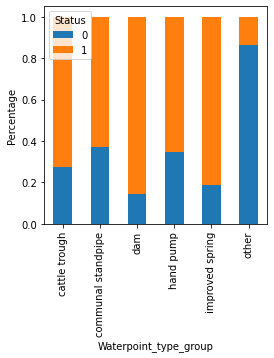

In [26]:
print(pd.crosstab(train1["Waterpoint_type_group"],train1["Status"]))
Waterpoint_type_group = pd.crosstab(train1["Waterpoint_type_group"],train1["Status"])
Waterpoint_type_group.div(Waterpoint_type_group.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Waterpoint_type_group")
plt.ylabel("Percentage")
plt.show()

The table shows the frequency counts for each combination of the two variables. For example, there are 9419 cases where the waterpoint type is "communal standpipe" and the waterpoint status is "0" (presumably indicating that the communal standpipe is not functioning).

Status           0      1
Quantity                 
dry           4825    118
enough        7284  17326
insufficient  4677   6305
seasonal      1045   1885
unknown        429    174


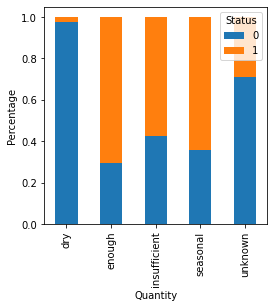

In [27]:
print(pd.crosstab(train1["Quantity"],train1["Status"]))
Quantity = pd.crosstab(train1["Quantity"],train1["Status"])
Quantity.div(Quantity.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Quantity")
plt.ylabel("Percentage")
plt.show()

The table shows the frequency counts for each combination of the two variables. For example, there are 4825 cases where the water quantity is "dry" and the waterpoint status is "0" (presumably indicating that there is no functioning waterpoint in that area).

In [28]:
train1.dtypes

Id                         int64
Amount_of_water          float64
Gps_height                 int64
Waterpoint_type           object
Basin_name                object
Village                   object
Regionname                object
Region_code                int64
Wardname                  object
District_code              int64
Population                 int64
Public_meeting              bool
Organization_funding      object
Organization_surveyed     object
Scheme_management         object
SchemeName                object
Permit                      bool
Company_installed         object
Management                object
Management_group          object
Extraction_type           object
Extraction_type_group     object
Extraction_type_class     object
Payment                   object
Payment_type              object
Water_quality             object
Quality_group             object
Quantity                  object
Quantity_group            object
Source                    object
Source_typ

In [29]:
categorical_columns=['Waterpoint_type', 'Basin_name','Village', 'Regionname','Wardname','Public_meeting', 'Organization_funding','Organization_surveyed', 'Scheme_management', 'SchemeName', 'Permit','Company_installed', 'Management', 'Management_group','Extraction_type', 'Extraction_type_group', 'Extraction_type_class', 'Payment', 'Payment_type', 'Water_quality', 'Quality_group', 'Quantity','Quantity_group', 'Source', 'Source_type', 'Source_class','Waterpoint_type_group',]

In [30]:
for i in categorical_columns:
  train1[i]=train1[i].astype('category').cat.codes

In [31]:
train1.dtypes

Id                         int64
Amount_of_water          float64
Gps_height                 int64
Waterpoint_type             int8
Basin_name                  int8
Village                    int16
Regionname                  int8
Region_code                int64
Wardname                   int16
District_code              int64
Population                 int64
Public_meeting              int8
Organization_funding       int16
Organization_surveyed       int8
Scheme_management           int8
SchemeName                 int16
Permit                      int8
Company_installed          int16
Management                  int8
Management_group            int8
Extraction_type             int8
Extraction_type_group       int8
Extraction_type_class       int8
Payment                     int8
Payment_type                int8
Water_quality               int8
Quality_group               int8
Quantity                    int8
Quantity_group              int8
Source                      int8
Source_typ

In [32]:
train1.head()

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
0,56421,0.0,1555,4,2,15081,15,15,1536,3,...,2,4,4,2,2,7,5,0,3,0
1,21324,500.0,857,2,6,13964,16,10,889,5,...,1,6,2,2,2,6,4,1,1,0
2,74,0.0,0,1,0,15958,17,17,1958,3,...,2,6,2,2,2,3,0,0,1,0
3,74038,0.0,0,6,4,3668,4,18,563,7,...,2,6,2,2,2,7,5,0,5,0
4,29929,0.0,0,4,3,11925,17,14,2024,4,...,2,6,2,1,1,3,0,0,3,1


In [33]:
test1.dtypes

Id                         int64
Amount_of_water          float64
Gps_height                 int64
Waterpoint_type           object
Basin_name                object
Village                   object
Regionname                object
Region_code                int64
Wardname                  object
District_code              int64
Population                 int64
Public_meeting              bool
Organization_funding      object
Organization_surveyed     object
Scheme_management         object
SchemeName                object
Permit                      bool
Company_installed         object
Management                object
Management_group          object
Extraction_type           object
Extraction_type_group     object
Extraction_type_class     object
Payment                   object
Payment_type              object
Water_quality             object
Quality_group             object
Quantity                  object
Quantity_group            object
Source                    object
Source_typ

In [34]:
categorical_list=['Waterpoint_type', 'Basin_name','Village', 'Regionname','Wardname','Public_meeting', 'Organization_funding','Organization_surveyed', 'Scheme_management', 'SchemeName', 'Permit','Company_installed', 'Management', 'Management_group','Extraction_type', 'Extraction_type_group', 'Extraction_type_class', 'Payment', 'Payment_type', 'Water_quality', 'Quality_group', 'Quantity','Quantity_group', 'Source', 'Source_type', 'Source_class','Waterpoint_type_group',]

In [35]:
for i in categorical_list:
  test1[i]=test1[i].astype('category').cat.codes

In [36]:
test1.dtypes

Id                         int64
Amount_of_water          float64
Gps_height                 int64
Waterpoint_type             int8
Basin_name                  int8
Village                    int16
Regionname                  int8
Region_code                int64
Wardname                   int16
District_code              int64
Population                 int64
Public_meeting              int8
Organization_funding       int16
Organization_surveyed       int8
Scheme_management           int8
SchemeName                 int16
Permit                      int8
Company_installed          int16
Management                  int8
Management_group            int8
Extraction_type             int8
Extraction_type_group       int8
Extraction_type_class       int8
Payment                     int8
Payment_type                int8
Water_quality               int8
Quality_group               int8
Quantity                    int8
Quantity_group              int8
Source                      int8
Source_typ

<Axes: >

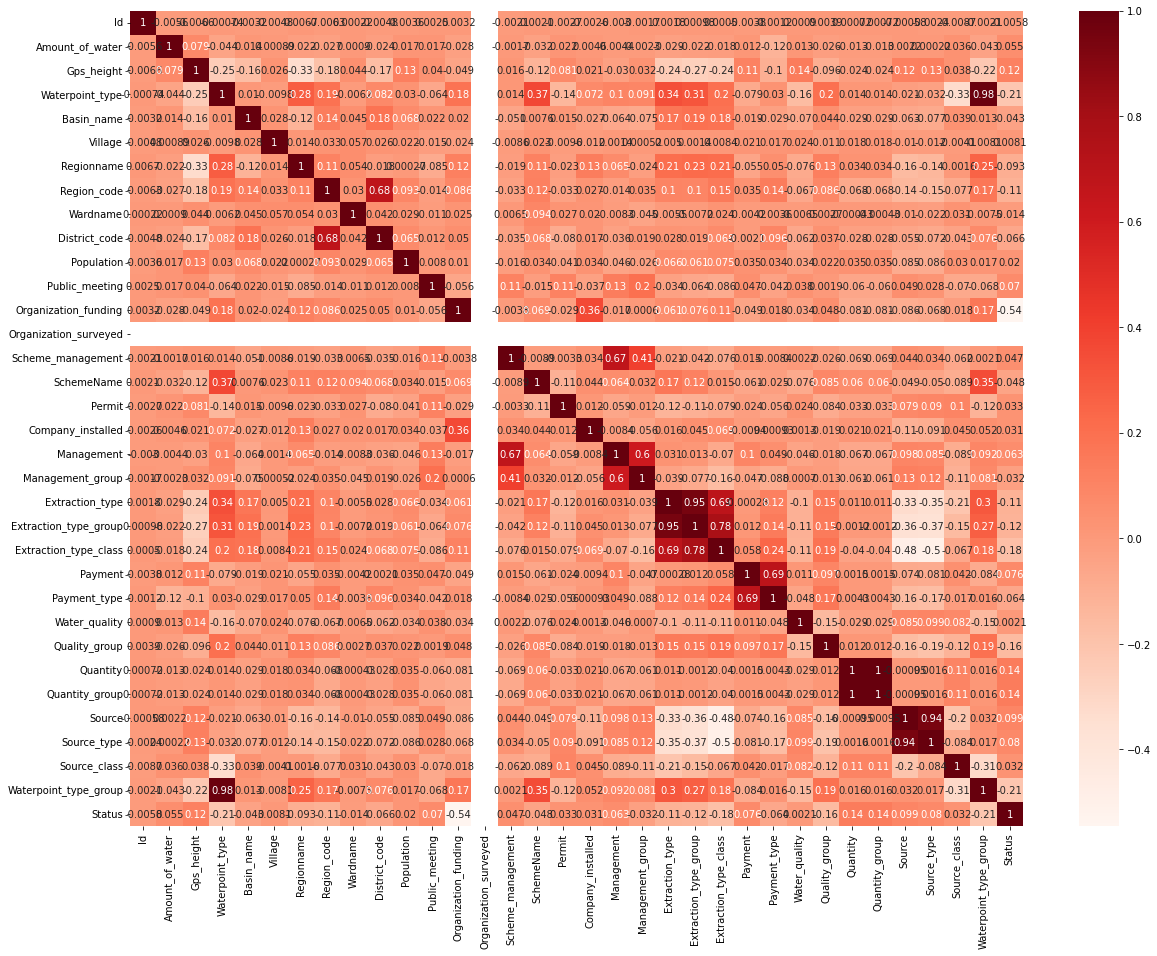

In [37]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(train1.corr(),annot=True,cmap='Reds')

In [38]:
train1=train1.drop(['Waterpoint_type'],axis=1)
train1=train1.drop(['Extraction_type'],axis=1)
train1=train1.drop(['Quantity'],axis=1)
train1=train1.drop(['Source'],axis=1)
train1=train1.drop(['Id'],axis=1)

In [39]:

train1=train1.drop(['Extraction_type_class'],axis=1)


<Axes: >

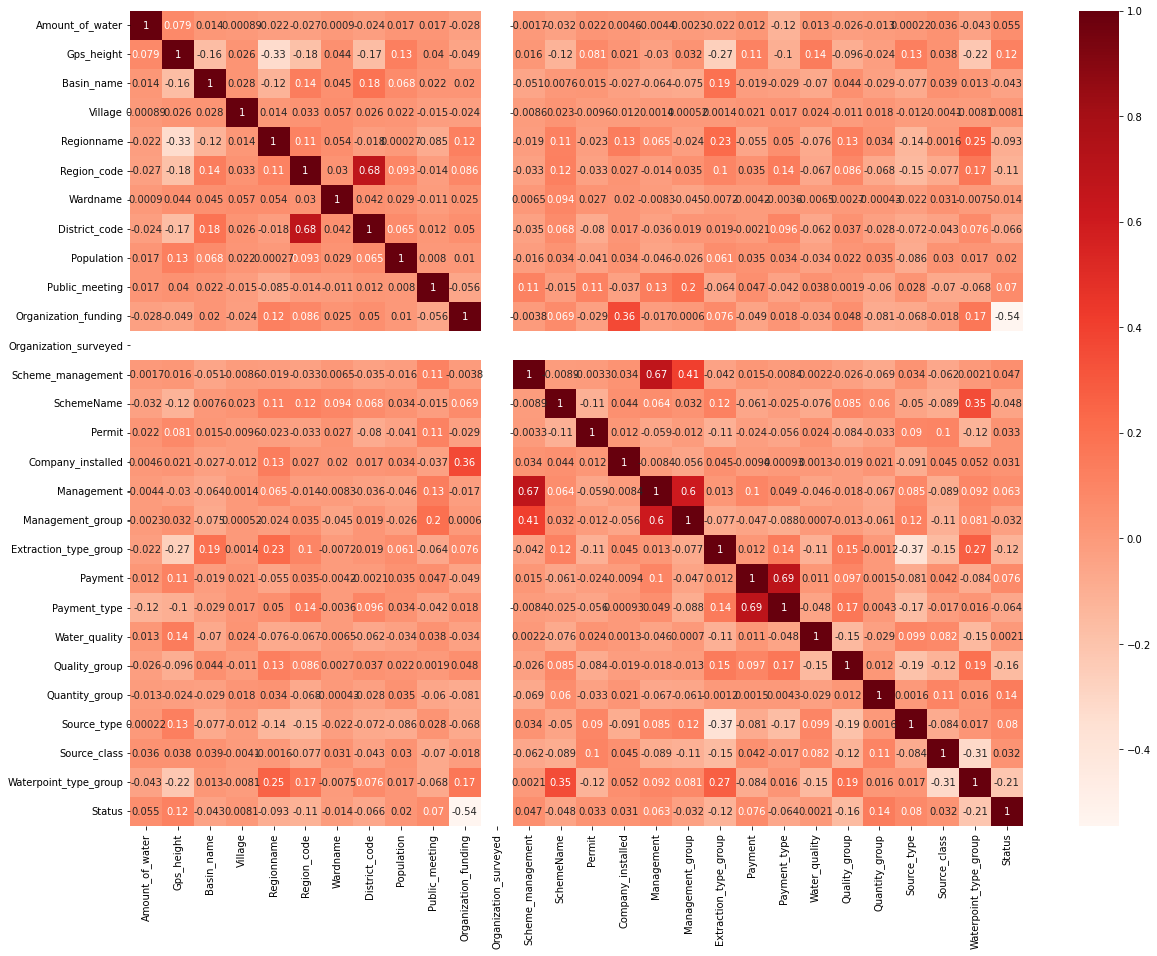

In [40]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(train1.corr(),annot=True,cmap='Reds')

In [41]:
train1["Status"].value_counts()

1    25808
0    18260
Name: Status, dtype: int64

In [42]:

train1["Status"].value_counts(normalize=True)*100

1    58.564037
0    41.435963
Name: Status, dtype: float64

<Axes: title={'center': 'Status of water scarcity'}>

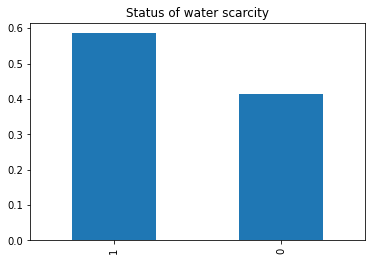

In [43]:
train1["Status"].value_counts(normalize=True).plot.bar(title = 'Status of water scarcity')

The plot shows that around 59% of the samples are labeled as "1", which means that they are experiencing water scarcity, while around 41% of the samples are labeled as "0", which means that they are not experiencing water scarcity.

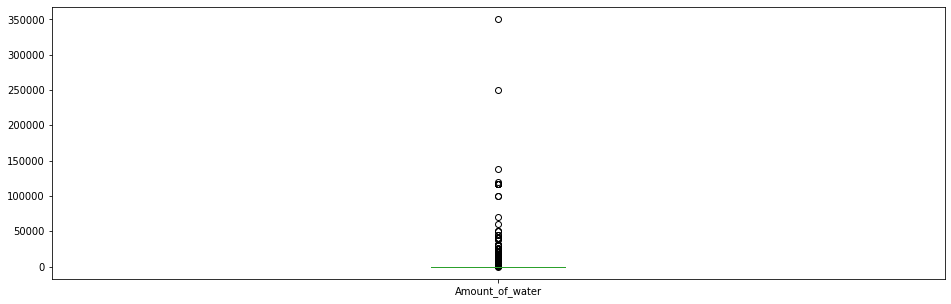

In [44]:

train1['Amount_of_water'].plot.box(figsize=(16,5))

plt.show()

In [45]:
q=train1['Amount_of_water'].quantile(0.95)
train1_cleaned =train1[train1['Amount_of_water']<q]

In [46]:
train1_cleaned.describe()

,Amount_of_water,Gps_height,Basin_name,Village,Regionname,Region_code,Wardname,District_code,Population,Public_meeting,...,Extraction_type_group,Payment,Payment_type,Water_quality,Quality_group,Quantity_group,Source_type,Source_class,Waterpoint_type_group,Status
count,41784.000000,41784.000000,41784.000000,41784.000000,41784.000000,41784.000000,41784.000000,41784.000000,41784.000000,41784.000000,...,41784.000000,41784.000000,41784.000000,41784.000000,41784.000000,41784.000000,41784.000000,41784.000000,41784.000000,41784.000000
mean,72.135646,641.621961,4.087904,8195.689953,9.931361,15.450124,1054.778217,5.800235,178.894074,0.911066,...,4.072324,2.330964,2.995860,5.744256,2.278552,1.316222,3.942155,0.224249,2.094342,0.573042
std,200.586322,691.346160,2.485032,4742.632500,5.934817,17.956036,595.769410,9.851235,477.371723,0.284651,...,3.547529,2.331244,1.786114,0.916011,0.802178,0.817338,2.207089,0.429307,1.395903,0.494642
min,0.000000,-63.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,4260.000000,5.000000,5.000000,552.000000,2.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,6.000000,2.000000,1.000000,3.000000,0.000000,1.000000,0.000000
50%,0.000000,322.000000,4.000000,8182.500000,10.000000,12.000000,1039.000000,3.000000,20.000000,1.000000,...,3.000000,3.000000,2.000000,6.000000,2.000000,1.000000,5.000000,0.000000,1.000000,1.000000
75%,10.000000,1303.000000,6.000000,12106.000000,15.000000,17.000000,1575.000000,5.000000,210.000000,1.000000,...,6.000000,4.000000,5.000000,6.000000,2.000000,2.000000,6.000000,0.000000,3.000000,1.000000
max,1000.000000,2628.000000,8.000000,16470.000000,20.000000,99.000000,2086.000000,80.000000,30500.000000,1.000000,...,12.000000,6.000000,6.000000,7.000000,5.000000,4.000000,6.000000,2.000000,5.000000,1.000000


In [47]:

train1_cleaned.head()

,Amount_of_water,Gps_height,Basin_name,Village,Regionname,Region_code,Wardname,District_code,Population,Public_meeting,...,Extraction_type_group,Payment,Payment_type,Water_quality,Quality_group,Quantity_group,Source_type,Source_class,Waterpoint_type_group,Status
0,0.0,1555,2,15081,15,15,1536,3,650,0,...,5,0,2,4,4,2,5,0,3,0
1,500.0,857,6,13964,16,10,889,5,600,0,...,1,3,1,6,2,2,4,1,1,0
2,0.0,0,0,15958,17,17,1958,3,0,1,...,12,0,2,6,2,2,0,0,1,0
3,0.0,0,4,3668,4,18,563,7,0,1,...,6,0,2,6,2,2,5,0,5,0
4,0.0,0,3,11925,17,14,2024,4,0,1,...,0,0,2,6,2,1,0,0,3,1


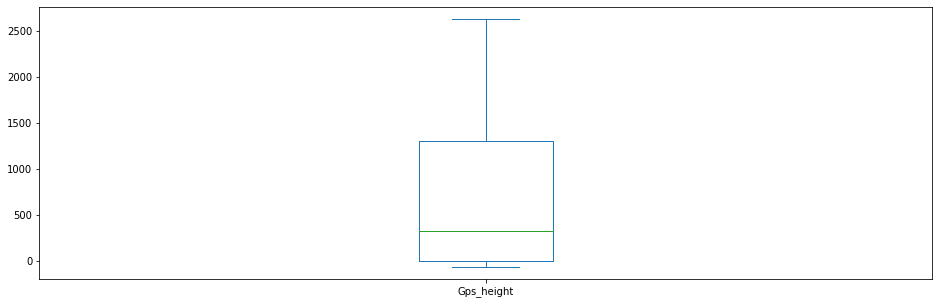

In [48]:

train1_cleaned['Gps_height'].plot.box(figsize=(16,5))

plt.show()

In [49]:
train_data = train1_cleaned.sample(frac=0.8, random_state=42)
test_data = train1_cleaned.drop(train_data.index)

In [50]:
X_train = train_data.drop(['Status'],axis=1)
y_train = train_data['Status']
X_test = test_data.drop(['Status'],axis=1)
y_test = test_data['Status']

In [51]:
from pprint import pprint

MODEL BUILDING


calculates the entropy of a target column.

In [52]:
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts=True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy


the function calculates the information gain 

In [53]:
def InfoGain(data,split_attribute_name,target_name="Status"):
    total_entropy = entropy(data[target_name])
    vals,counts = np.unique(data[split_attribute_name],return_counts=True)
    #cal the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name])for i in range(len(vals))])
    
    Information_Gain = total_entropy-Weighted_Entropy
    return Information_Gain 

 The ID3 algorithm builds a tree by recursively selecting the feature that maximizes the information gain at each node.

In [54]:
def ID3(data, originaldata, features, target_attribute_name='Status', parent_node_class=None, max_depth=None, min_samples_split=None, min_samples_leaf=None):
     if len(np.unique(data[target_attribute_name])) <= 1:
         return np.unique(data[target_attribute_name])[0]

     elif len(data) < min_samples_split:
         return parent_node_class
     
     elif len(features) == 0 or max_depth == 0:
        return np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])]

     else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])]

     item_values = [InfoGain(data,feature,target_attribute_name)for feature in features] 
     best_feature_index = np.argmax(item_values)
     best_feature = features[best_feature_index]

     tree = {best_feature:{}}
     features = [i for i in features if i!= best_feature]
     
     for value in np.unique(data[best_feature]):
         value = value
         sub_data = data.where(data[best_feature]==value).dropna()
         subtree = ID3(sub_data,train1_cleaned,features,target_attribute_name,parent_node_class,max_depth-1, min_samples_split,min_samples_leaf)
         tree[best_feature][value] = subtree
     return(tree)

In [55]:
def predict(query, tree, default=1):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]]
            except:
                return default

            result = tree[key][query[key]]
            if isinstance(result, dict):
                return predict(query, result)
            else:
                return result


In [56]:
def test(data,tree):
   queries = data.iloc[:,:-1].to_dict(orient="records")
   predicted = pd.DataFrame(columns=["predicted"])
   for i in range(len(data)):
       predicted.loc[i,"predicted"] = predict(queries[i],tree,1.0)
   print("The Prediction accuracy is:",(np.sum(predicted["predicted"]==data["Status"])/len(data))*100,'%')

In [57]:
def evaluate_accuracy(data, model, target_attribute_name):
    predictions = predict(data, model)
    actual = data[target_attribute_name]
    accuracy = sum(predictions == actual) / len(data)
    return accuracy

    



In [58]:
def grid_search_ID3(data, features, target_attribute_name, hyperparameters):
    best_score = 0
    best_model = None
    
    for max_depth in hyperparameters['max_depth']:
        for min_samples_split in hyperparameters['min_samples_split']:
            for min_samples_leaf in hyperparameters['min_samples_leaf']:
                model = ID3(data, data, features, target_attribute_name=target_attribute_name, 
                            max_depth=max_depth, min_samples_split=min_samples_split, 
                            min_samples_leaf=min_samples_leaf)
                score = evaluate_accuracy(data, model, target_attribute_name)
                
                if score > best_score:
                    best_score = score
                    best_model = model
    
    return best_model, best_score



In [59]:
parameter_grid = {'max_depth': [8,10,12,15],
              'min_samples_split': [4, 6,8,10],
              'min_samples_leaf': [ 4, 6,8,10]}


In [ ]:
grid_search_ID3(train_data,train_data.columns[:-1],target_attribute_name='Status',hyperparameters=parameter_grid)

In [ ]:
#Train the tree,print the tree and predict the accuracy
tree=ID3(train_data,train_data,train_data.columns[:-1],max_depth=115,min_samples_split=8,min_samples_leaf=6)
pprint (tree)
test(test_data,tree)

Streaming output truncated to the last 5000 lines.
             11596: 0.0,
             11597: 1.0,
             11598: 0.0,
             11599: 1.0,
             11600: 0.0,
             11601: 1.0,
             11603: 1.0,
             11604: 0.0,
             11605: 1.0,
             11607: 0.0,
             11608: 0.0,
             11609: 1.0,
             11610: 0.0,
             11611: 1.0,
             11612: 1.0,
             11613: 1,
             11614: 1.0,
             11616: 1.0,
             11617: 0.0,
             11618: {'Water_quality': {4.0: 0.0, 6.0: 1.0}},
             11619: 1,
             11621: 1.0,
             11622: 0.0,
             11623: 0.0,
             11624: 1,
             11625: 1.0,
             11626: 1.0,
             11627: 1,
             11628: 1.0,
             11629: 1,
             11630: 0.0,
             11631: 1,
             11632: 0.0,
             11633: 0.0,
             11634: 1.0,
             11635: 1.0,
             11636: 1.0,


In [ ]:
tree=ID3(train_data,train_data,train_data.columns[:-1],max_depth=20,min_samples_split=10,min_samples_leaf=10)
pprint (tree)
test(test_data,tree)

Streaming output truncated to the last 5000 lines.
             11848: 1.0,
             11849: 1.0,
             11850: 0.0,
             11853: 1.0,
             11854: 1.0,
             11855: 1.0,
             11856: 1.0,
             11857: 1.0,
             11859: 1.0,
             11860: 1.0,
             11861: 1.0,
             11863: 1.0,
             11864: 1.0,
             11865: 1.0,
             11866: 1.0,
             11867: 0.0,
             11868: 1.0,
             11869: 1.0,
             11871: 0.0,
             11872: 1.0,
             11873: 1.0,
             11874: 1.0,
             11875: {'Gps_height': {251.0: 0.0,
                                    254.0: 0.0,
                                    257.0: 1.0,
                                    298.0: 1.0,
                                    302.0: 0.0,
                                    303.0: 1.0,
                                    304.0: 1.0,
                                    305.0: 1.0,
               